In [34]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [35]:
file = pd.read_csv('GameData.csv' ,dtype = {'name': str,'owners':int,'developer ' : str ,'publisher':str , 'price ':float ,'initialprice ':float }, header=0, low_memory=False , keep_default_na=False , encoding='ANSI')


In [36]:
list(file.columns.values)

['appid',
 'name',
 'developer',
 'publisher',
 'score_rank',
 'positive',
 'negative',
 'userscore',
 'owners',
 'average_forever',
 'average_2weeks',
 'median_forever',
 'median_2weeks',
 'price',
 'initialprice',
 'discount',
 'ccu',
 'languages',
 'genre',
 'tags',
 'genre1',
 'genre2',
 'genre3',
 'genre4',
 'genre5',
 'genre6',
 'genre7',
 'english',
 'chinese',
 'french',
 'german',
 'italian',
 'spanish',
 'total_lang',
 'lang_collection',
 'price_cat']

In [37]:
def getOutLiars(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    return ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

price_cat     812
price        1849
dtype: int64


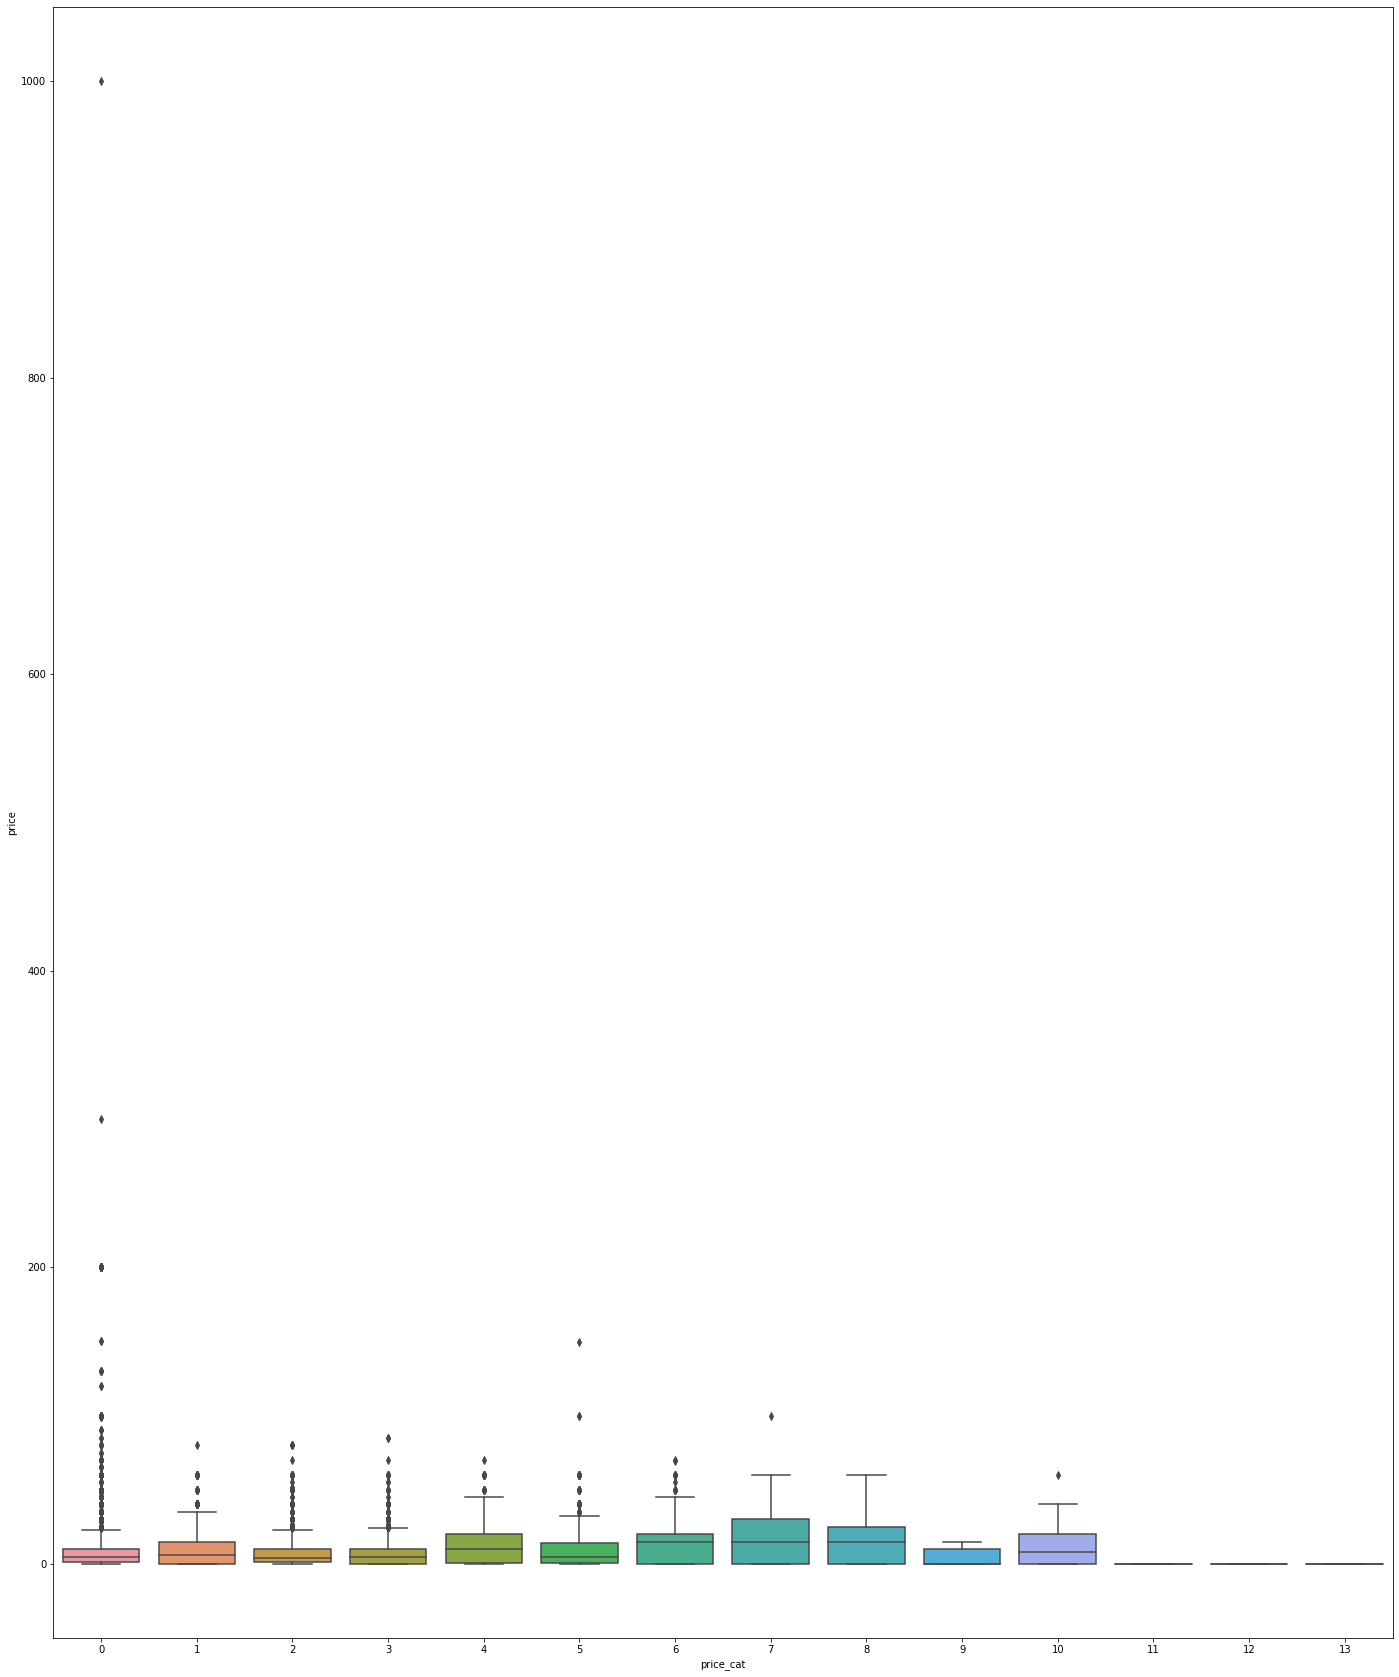

In [51]:
owners = pd.DataFrame(file[['price_cat' , 'price']])

f = plt.figure(figsize=(24,30))
sb.boxplot(x = 'price_cat' , y = 'price'  , data= owners)

print(getOutLiars(owners))

,price_cat
count,42304.00000
mean,0.91658
std,1.63110
min,0.00000
25%,0.00000
50%,0.00000
75%,2.00000
max,13.00000


# Catagorise Data

In [25]:
tempList = owners.values.tolist()
tempDic = {}
count = 0

for data in tempList:
    if(tempDic.get(str(data)) == None):
        tempDic[str(data)] = count
        count += 1        

for row in owners.values.tolist():
    tempList.append(tempDic[str(row)])

    
mypd = pd.DataFrame(tempList)
mypd.to_csv('test.csv')
print(mypd)

{'[20000]': 0, '[500000]': 1, '[50000]': 2, '[100000]': 3, '[1000000]': 4, '[200000]': 5, '[2000000]': 6, '[10000000]': 7, '[5000000]': 8, '[50000000]': 9, '[20000000]': 10, '[0]': 11, '[100000000]': 12, '[200000000]': 13}
